## Exercises
The goal of these exercises is to challenge you a little bit and make you think. The questions are designed to allow you to have a play around and try a few things before getting to the answer. The solutions are obtainable by writing very similar code to what has been explored in the previous notebooks, but may require an extra step of logic.

The solutions will be released after the lecture on Thursday.

Let's start with importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
%matplotlib inline

### Exercise 1

**1. a)** Import the two-dimensional csv data from the file `Data/nonlinear_ex.csv` into a DataFrame using Pandas and create a scatter plot with `x='input'` and `y='target'`.

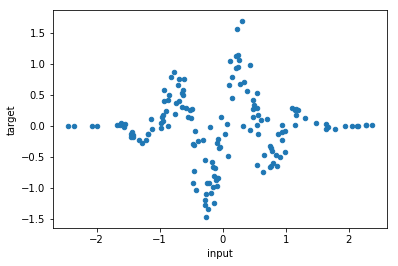

In [2]:
# Write your answer here
df_nonlinear = pd.read_csv('Data/nonlinear_ex.csv', sep=',', header=0)
df_nonlinear.plot.scatter(x='input', y='target');

**1. b)** Extract the `'target'` column to create a target vector `y` and extract the `'input'` column to create an attribute matrix `X`. Hint: Don't forget to make X two dimensional by adding a new column! Then normalise `X` to zero mean and unit variance.

In [3]:
# Write your answer here
y_nl = df_nonlinear['target']
X_nl = df_nonlinear['input'][:, np.newaxis]
X_nl=(X_nl-X_nl.mean())/X_nl.std()

**1. c)** Using the `estimator` and `param_grid` variables specified below: Split the dataset into train and test datasets with test set size of $0.5$, then setup a `GridSearchCV` grid search fit the grid search to find the best values of `alpha` and `gamma`.

In [4]:
# Using this estimator and these parameters 
estimator = KernelRidge(kernel='rbf', gamma=0.1)
param_grid = {"alpha": [1e0, 0.1, 1e-2, 1e-3], 
              "gamma": np.logspace(-2, 2, 5)}

# Write your answer here
X_nl_train, X_nl_test, y_nl_train, y_nl_test = train_test_split(X_nl,y_nl, test_size=0.5, random_state=0)
search = GridSearchCV(estimator,param_grid=param_grid)
search.fit(X_nl_train, y_nl_train);

**1. d)** Do your best to try to create an plot that looks like the folowing image showing: (1) the training data using black circles, (2) the test data using blue crosses, and (3) predictions on a linear space using a grey line. 

<img src="image_1d.png">

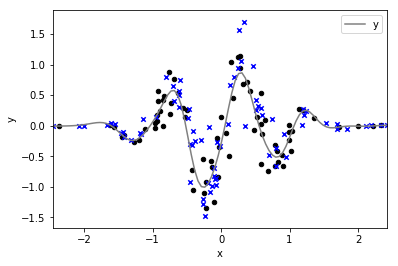

In [5]:
# Write your answer here
X_linspace = np.linspace(np.max(X_nl), np.min(X_nl), 100)[:, np.newaxis]
ax = pd.DataFrame({'x':X_nl_train[:,0],'y':y_nl_train}).plot.scatter(x='x', y='y',c='k');
pd.DataFrame({'x':X_nl_test[:,0],'y':y_nl_test}).plot.scatter(x='x', y='y',ax=ax ,c='b',marker='x');
pd.DataFrame({'x':X_linspace[:,0],'y':search.predict(X_linspace)}).plot(x='x', y='y',ax=ax ,c='gray');

### Exercise 2

**2. a)** Load in the csv `Data/classed_ex.csv` and print the head.

In [6]:
# Write your answer here
df_classed = pd.read_csv('Data/classed_ex.csv', sep=',', header=0)
df_classed.head()

,x1,x2,y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


**2. b)** Create a scatter plot of `'x1'` versus `'x2'` and colour examples with target $0$ to be blue and with target $1$ to be red.

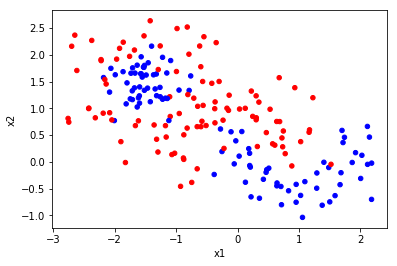

In [7]:
# Write your answer here
df_classed.plot.scatter(x='x1', y='x2',c=df_classed.y.map({0:'r', 1:'b'}));

**2. c)** For the provided `estimator` and `param_grid `: format the data to $X$ and $y$, normalise the data to zero mean and unit variance, and perform and grid search print the best parameters and score (mean accuracy).

In [8]:
# Estimator and param_grid provided
estimator = SVC(kernel='rbf')
param_grid = {'gamma': [1e-1,1e-2,1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

# Write your answer here
y_cl = df_classed['y']
X_cl = df_classed.drop('y', axis=1)
X_cl=(X_cl-X_cl.mean())/X_cl.std()
search = GridSearchCV(estimator,param_grid=param_grid)
search.fit(X_cl, y_cl);
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.820):
{'C': 100, 'gamma': 0.1}


**2. d)** Use the `plot_results` function from the classification notebook to visualise results. Hint: use `search` as the classifier and update the color-map to be `df_classed.y.map({0:'r', 1:'b'}`.

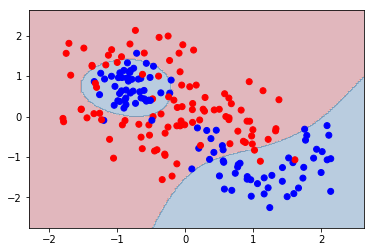

In [9]:
# Write your answer here
def plot_results(X, y, clf):
    xx, yy = np.meshgrid(np.arange(X['x1'].min() - .5, X['x1'].max() + .5, 0.02),
                         np.arange(X['x2'].min() - .5, X['x2'].max() + .5, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    _, ax = plt.subplots()
    ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=.3)
    ax.scatter(X['x1'],X['x2'],c=df_classed.y.map({0:'r', 1:'b'}));

plot_results(X_cl, y_cl, search)

### Exercise 3

**3. a)** Load in the image data and visualise first $5$ images in subplolts

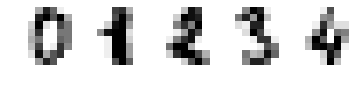

In [10]:
# Write your answer here
rows, columns = 1, 5
digits = datasets.load_digits()
_, axes = plt.subplots(rows, columns, figsize=(6,6))
for ax, image in zip(axes.flatten(), digits.images[:rows*columns]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_axis_off()

**3. b)** Extract all the images with target value $1$ and visualise the first five in subplots.

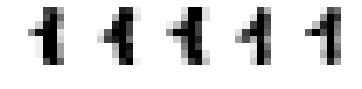

In [11]:
# Write your answer here
ind_1 = np.argwhere(digits.target==1).flatten()
_, axes = plt.subplots(1, 5, figsize=(6,6))
for i in range(5):
    image = digits.images[ind_1[i]]
    axes[i].imshow(image, cmap=plt.cm.gray_r)
    axes[i].set_axis_off()
    

**3. c)** Use numpy to calulate a *mean* image of all the images with target value $1$, and then visualise it. Hint: Think about which `axis` you need to take the mean over.

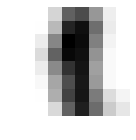

In [12]:
# Write your answer here
image_1_mean = np.mean(digits.images[ind_1], axis=0)
_, axes = plt.subplots(figsize=(2,2))
axes.imshow(image_1_mean, cmap=plt.cm.gray_r)
axes.set_axis_off()

**3. d)** Using the following `estimator` and `param_grid` to perform grid search over the numbr of 'Principle Component Analysis' (PCA) components and over the logistic regression value of 'C'. Print the results.

In [13]:
# Estimator and param_grid
estimator = Pipeline(steps=[('pca', PCA()), 
            ('svc', SVC(kernel="linear"))])

param_grid = {
    'pca__n_components': [15, 30, 45],
    'svc__C': [1e-2, 1e-1, 1e0],
}
# Write your answer here
search = GridSearchCV(estimator, param_grid, n_jobs=-1)
search.fit(digits.data, digits.target)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.944):
{'pca__n_components': 45, 'svc__C': 0.1}
